In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')




In [55]:
data=pd.read_csv('diabetes.csv')

In [56]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [59]:
 data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [60]:
data.duplicated().sum()

0

### analysis

In [61]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

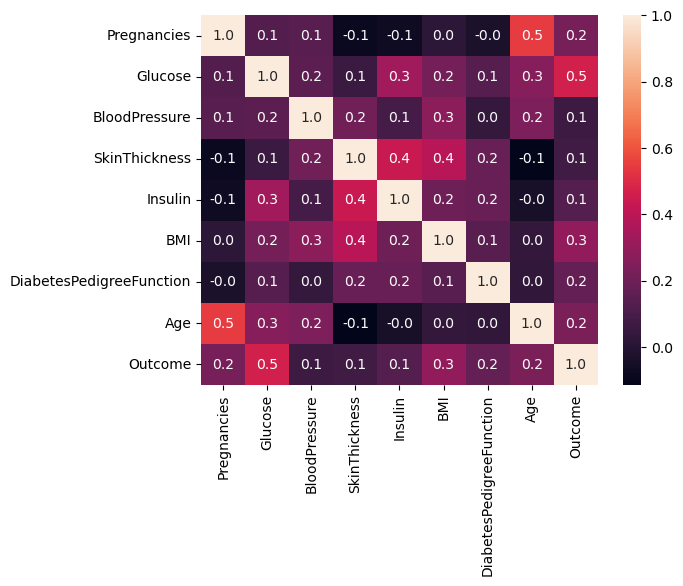

In [62]:
sns.heatmap(data.corr(),annot=True,fmt='0.1f')

### check balanced of data

<Axes: xlabel='Outcome', ylabel='count'>

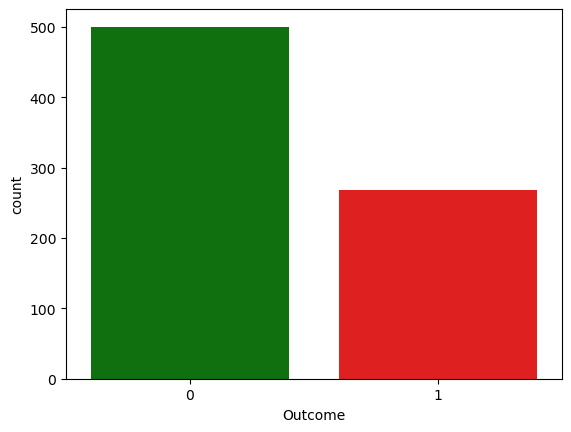

In [63]:
sns.countplot(x='Outcome',data=data,palette=['g','r'])

In [64]:
num_of_0=data[data['Outcome']==0]
num_of_1=data[data['Outcome']==1]
num_of_0.shape,num_of_1.shape


((500, 9), (268, 9))

In [65]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [66]:
rm=RandomOverSampler(random_state=40)
x_new,y_new=rm.fit_resample(x,y)


In [67]:
#to show result before and after
from collections import Counter
print('old data shape{}'.format(Counter(y)))
print('new data shape{}'.format(Counter(y_new)))

old data shapeCounter({0: 500, 1: 268})
new data shapeCounter({1: 500, 0: 500})


In [68]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.1)
                                               

In [69]:
model1=LogisticRegression()
model2=SVC()
model3=RandomForestClassifier(n_estimators=1000)
model4=GradientBoostingClassifier(n_estimators=1000)

In [70]:
columns=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
result1=[]
result2=[]
result3=[]

In [71]:
def classification(model):
    model.fit(x_train,y_train)
    pr=model.predict(x_test)
    accuracy=accuracy_score(pr,y_test)
    recall=recall_score(pr,y_test)
    f1=f1_score(pr,y_test)
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    
    sns.heatmap(confusion_matrix(pr,y_test),annot=True)
    print(model)
    print('accuracy is : ',accuracy,'recall is :',recall,'f1_score : ',f1)

LogisticRegression()
accuracy is :  0.81 recall is : 0.7959183673469388 f1_score :  0.8041237113402062
SVC()
accuracy is :  0.75 recall is : 0.7555555555555555 f1_score :  0.7311827956989247
RandomForestClassifier(n_estimators=1000)
accuracy is :  0.92 recall is : 0.8571428571428571 f1_score :  0.9230769230769231
GradientBoostingClassifier(n_estimators=1000)
accuracy is :  0.87 recall is : 0.8181818181818182 f1_score :  0.8737864077669902


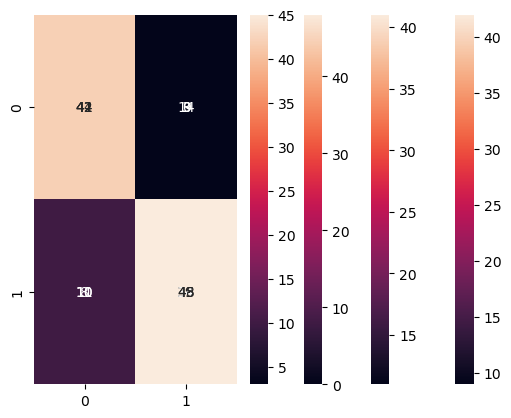

In [72]:
classification(model1)
classification(model2)
classification(model3)
classification(model4)

In [51]:
display=pd.DataFrame({'Algorithm':columns,'Accuracy':result1,'Recall':result2,'F1_score':result3})

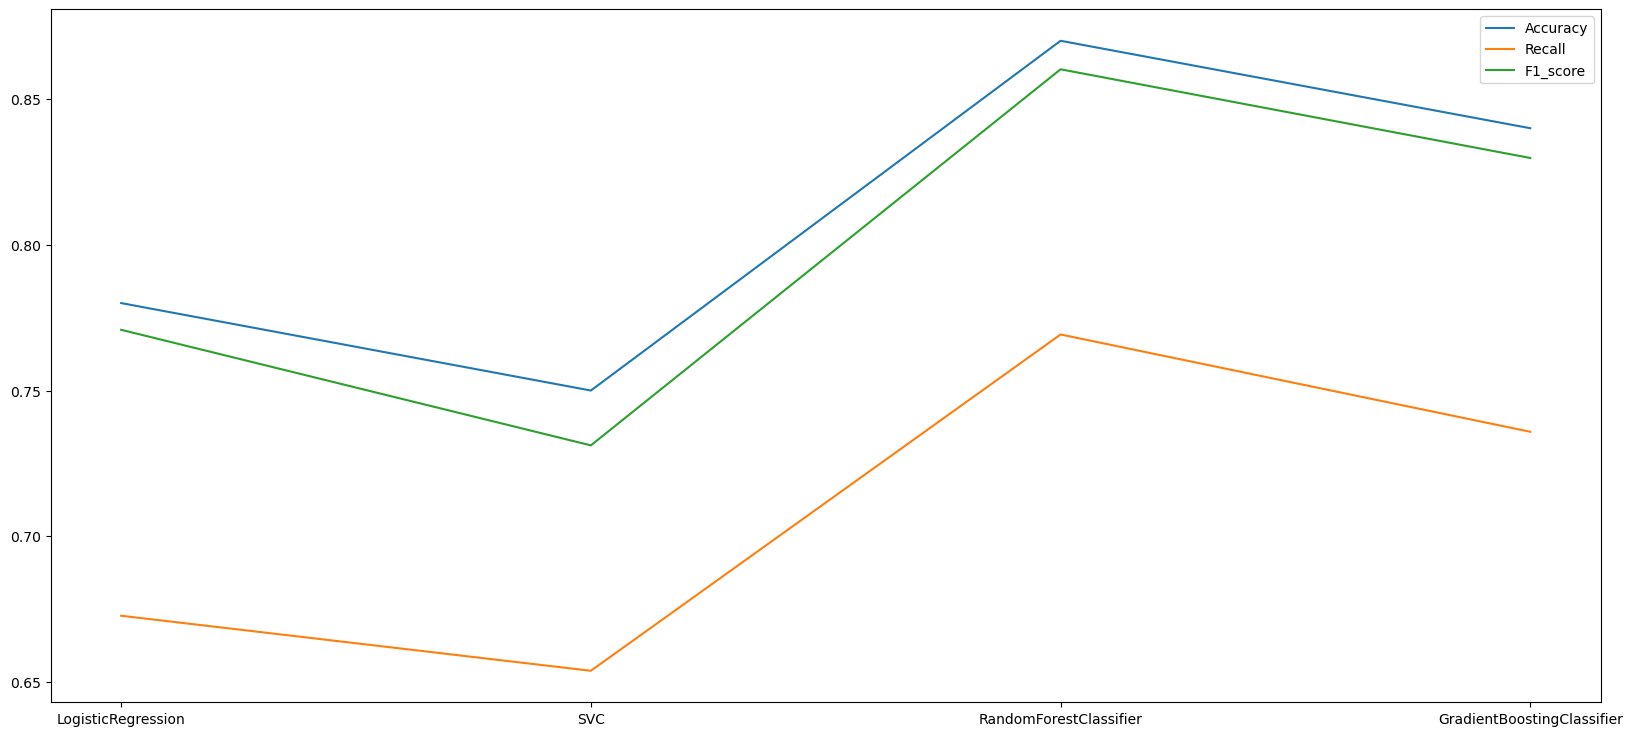

In [52]:
fig,ax=plt.subplots(figsize=(20,9))
plt.plot(display.Algorithm,result1,label='Accuracy')
plt.plot(display.Algorithm,result2,label='Recall')
plt.plot(display.Algorithm,result3,label='F1_score')
plt.legend()
plt.show()